In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('video_id_info.csv', on_bad_lines='skip')

C:\Users\admin\AppData\Local\Temp\ipykernel_20288\3516375533.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('video_id_info.csv', on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

Perform Sentiment Analysis

In [7]:
import sys
# Provides access to system specific parameters and functions.

In [8]:
from textblob import TextBlob


Library used for various tasks such as Part-of-Speech tagging, sentiment analysis.

In [9]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [10]:
df.shape

(691374, 4)

In [11]:
sample_df = df[0:1000]
# We are just trying for 1000 row data only

In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment
# Give the nature of the sentence

Sentiment(polarity=0.0, subjectivity=0.1)

In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity           
# That means this is a netural sentence

0.0

If there exists a comment with a blank space, that needs to be handled. So we've to perform an exception handling here.


We are going to check sentiment for each comment


In [15]:

polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
len(polarity)

691374

In [ ]:
df['polarity'] = polarity

In [ ]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


 WorldCloud Analysis of the Data

In [ ]:
f1 = df['polarity']==1
cmnt_positive = df[f1]

# This gives the comments that has the positive sentiment i.e polarity = 1

In [ ]:
f2 = df['polarity']== -1
cmnt_negative = df[f2]

# This gives the comments that has the negative sentiment i.e polarity = -1

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [ ]:
type(df['comment_text'])

pandas.core.series.Series

In [ ]:
Total_cmnts_positive = ' '.join(cmnt_positive['comment_text'])
# Concatinating the comments into single string(Total_cmnts_positive)

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(Total_cmnts_positive)
# Creating the wordcloud of Total_cmnts_positive

(-0.5, 399.5, 199.5, -0.5)

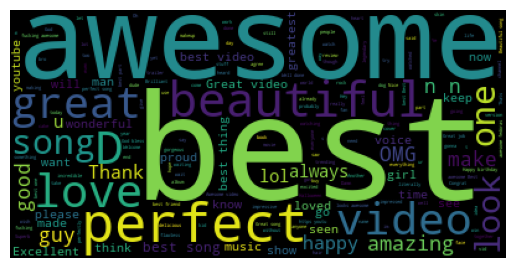

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

# The imshow() is used to display the wordcloud image.

Conclusion -->  Positive users are emphasizing more on "Best", "Awesome", "Beautiful".

In [ ]:
Total_cmnts_negative = ' '.join(cmnt_negative['comment_text'])
# Concatinating the comments into single string(Total_cmnts_negative)

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(Total_cmnts_negative)
# Creating the wordcloud of Total_cmnts_negative

(-0.5, 399.5, 199.5, -0.5)

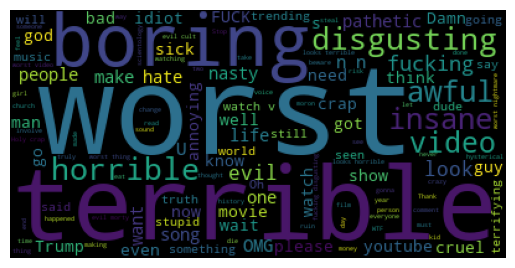

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

Conclusion -->  Negative users are emphasizing more on "Boring", "Worst", "Terrible".

Perform Emoji Analysis

In [ ]:
import emoji

In [ ]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [ ]:
comment = "trending 😉"

In [ ]:
[char for char in comment if char in emoji.EMOJI_DATA]
# This will return the emojis from the string that is stored in comment.

['😉']

In [ ]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        
emoji_list        

['😉']

In [ ]:
all_emojis_list = []

for comment in df['comment_text'].dropna():       # If there are missing values present, this will drop it
    
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
        
    

In [ ]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

Now we are going to compute the frequency of each emoji

In [ ]:
from collections import Counter
# Collections is the module and Counter is the Class. Used for counting the occurence of items

In [ ]:
Counter(all_emojis_list).most_common(10)
# Returns a list of the 10 most common items

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
Counter(all_emojis_list).most_common(10)[0]         # Gives the First Item in the Tuple

('😂', 36987)

In [ ]:
Counter(all_emojis_list).most_common(10)[0][0]      # Gives the first element of Tuple

'😂'

In [ ]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [ ]:
Counter(all_emojis_list).most_common(10)[3][0]

'🔥'

Similarly, We can check the frequency for all top 10 emojis.

In [ ]:
frequency = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
frequency
# This will give the frequency of all emojis in the tuple

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis
# This will return all the emojis in the tuple

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'                       # Sets the Default rendering method for Plotly figures to 'iframe_connected

In [ ]:
import plotly.graph_objects as go
trace = go.Bar(x=emojis , y=frequency)

In [ ]:
from plotly.offline import plot
plot([trace], filename='emoji_frequency.html', auto_open = True)       # This will create a html file and we can redirect to that page directly .

'emoji_frequency.html'

Conclusions --> Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding.

Collection of Youtube Data

In [ ]:
import os 

In [ ]:
files = os.listdir(r'C:\Sarthak\Data Science Projects\Python\Python_youtube_Analysis\YT_additional_data')

In [ ]:
file_csv = [file for file in files if '.csv' in file]
file_csv
# This gives all '.csv' in the directory

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'youtube_sample.csv']

In [ ]:
import warnings                             # This is the module used to handle warnings
from warnings import filterwarnings
filterwarnings('ignore')                    # We are silencing all warnings

In [ ]:
full_df = pd.DataFrame()
path = r'C:\Sarthak\Data Science Projects\Python\Python_youtube_Analysis\YT_additional_data'

In [ ]:
for file in file_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1')             # This gives the full path to the csv file that we want to read.
    # encoding='iso-8859-1 . This is the character encoding that handles special characters and symbols
    
    full_df = pd.concat([current_df, full_df], ignore_index=True)

In [ ]:
full_df.shape

(376942, 16)

In [ ]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
376937    False
376938    False
376939    False
376940    False
376941    False
Length: 376942, dtype: bool

In [ ]:
full_df[full_df.duplicated()].shape

(36911, 16)

In [ ]:
full_df = full_df.drop_duplicates() 
# Droping the duplicate values

In [ ]:
full_df.shape

(340031, 16)

In [ ]:
full_df[0:1000].to_csv(r'C:\Sarthak\Data Science Projects\Python\Python_youtube_Analysis/YT_additional_data/youtube_sample.csv', index=False)
# Storing thee Data in csv file

In [ ]:
full_df[0:1000].to_json(r'C:\Sarthak\Data Science Projects\Python\Python_youtube_Analysis/YT_additional_data/youtube_sample.json')
# Storing the data in json file

Which Category has the Maximum Likes?

In [ ]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Ã¢ÂÂ¶ \n\nSUBSCRIBE Ã...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
full_df['category_id'].unique()
#returns an array containing the unique values of the category_id

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43, 30,
       44], dtype=int64)

In [ ]:
json_df = pd.read_json(r'C:\Sarthak\Data Science Projects\Python\Python_youtube_Analysis\YT_additional_data/US_category_id.json')
# Reading the json file. 

In [ ]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
json_df['items'][0]          # Retrives 1st item from items

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
cat_dict = {}           # Creates an empty Dictionary

for item in json_df['items'].values:           
    cat_dict[int(item['id'])] = item['snippet']['title']

In [ ]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)   # Mapping of cat_dict to each element in category_id.
full_df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
376937      Entertainment
376938      Entertainment
376939             Gaming
376940    News & Politics
376941      Entertainment
Name: category_name, Length: 340031, dtype: object

In [ ]:
full_df.head(4)
# Now, There is new column "category_name"

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Ã¢ÂÂ¶ \n\nSUBSCRIBE Ã...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment


Which category has maximum Likes?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Science & Technology'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'News & Politics'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Howto & Style'),
  Text(11, 0, 'Autos & Vehicles'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

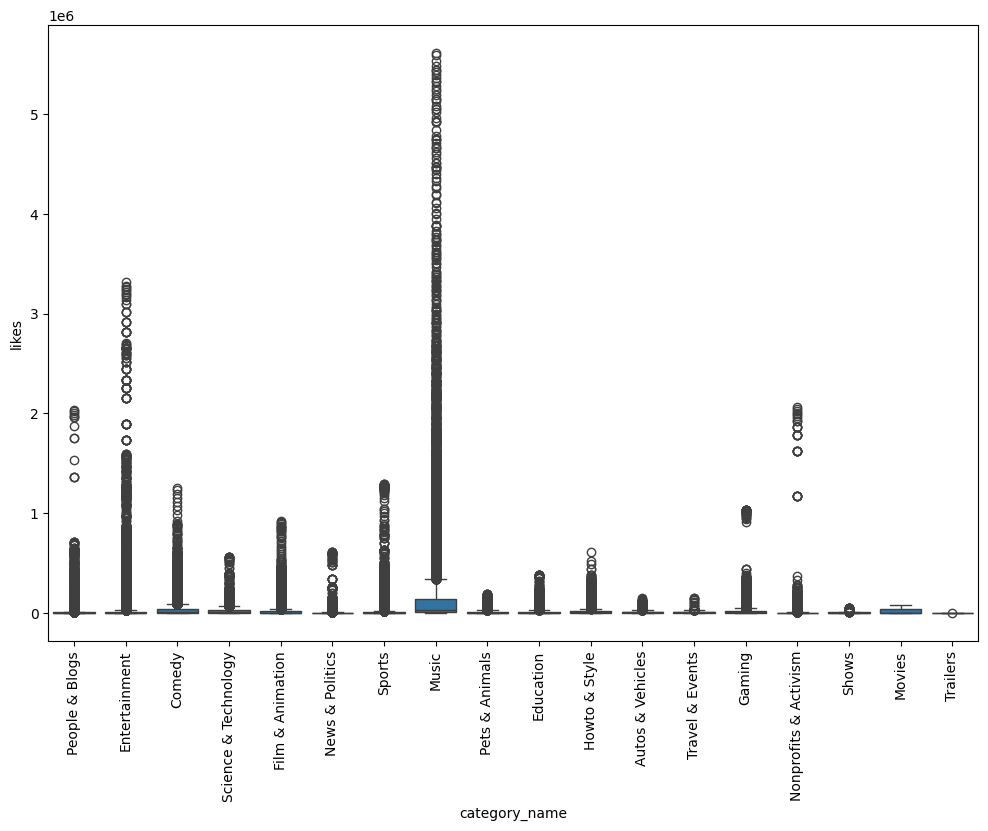

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

Find out whether audience is engaged or not

Analyzing the Like Rate, Dislike, Comment_Count_Rate

In [ ]:
full_df['likes']/full_df['views']* 100

0         7.686932
1         4.017930
2         4.575780
3         2.964146
4         6.309732
            ...   
376937    2.108199
376938    0.445137
376939    3.349079
376940    1.835539
376941    0.279350
Length: 340031, dtype: float64

In [ ]:
full_df['like_rate'] = full_df['likes']/full_df['views']* 100
# Adding the like rate column to the Dataset.

In [ ]:
full_df['dislike_rate'] = full_df['dislikes']/full_df['views']* 100

In [ ]:
full_df['comment_count_rate'] = full_df['comment_count']/full_df['views']* 100

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

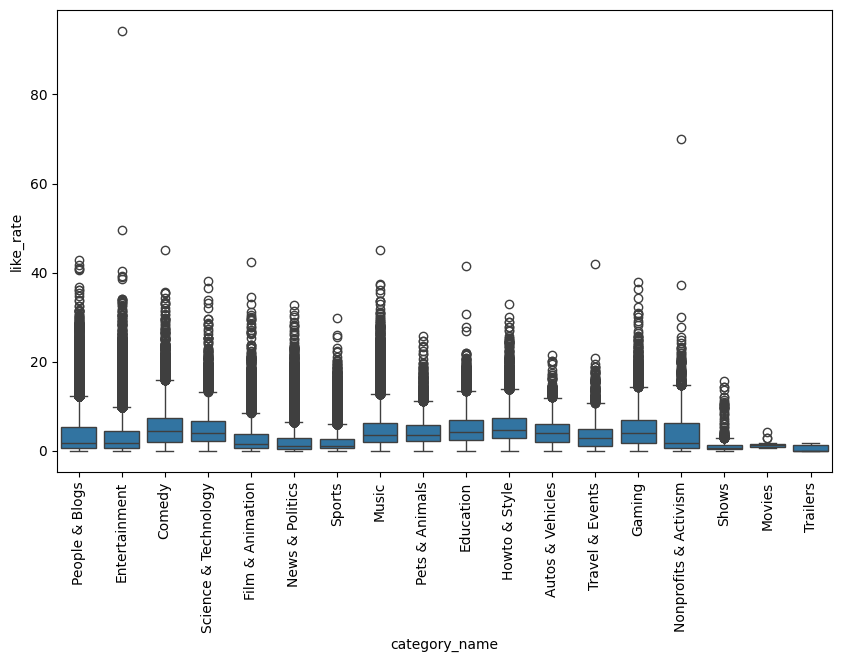

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

Analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

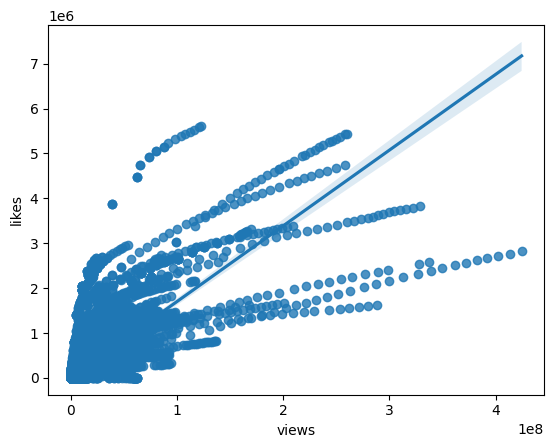

In [ ]:
sns.regplot(x='views' , y='likes' , data = full_df)
# We are plotting regression plot. It is the combination of Scatter plot and a line on top of that

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [ ]:
full_df[['views', 'likes', 'dislikes']]
# This will just show these 3 columns

,views,likes,dislikes
0,748374,57527,2966
1,2418783,97185,6146
2,3191434,146033,5339
3,343168,10172,666
4,2095731,132235,1989
...,...,...,...
376937,80685,1701,99
376938,103339,460,66
376939,773347,25900,224
376940,115225,2115,182


In [ ]:
full_df[['views', 'likes', 'dislikes']].corr()
# This will give give the correlation between views, likes, dislikes

,views,likes,dislikes
views,1.000000,0.779474,0.405484
likes,0.779474,1.000000,0.451644
dislikes,0.405484,0.451644,1.000000


<Axes: >

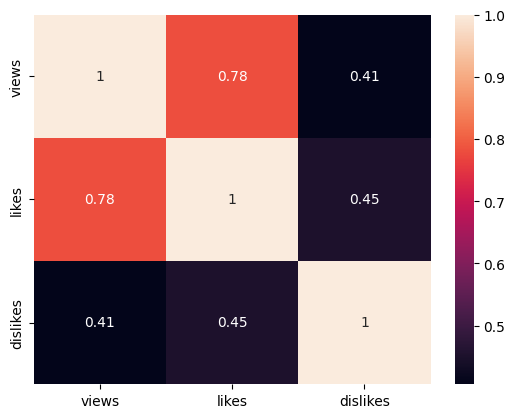

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True) 
# corr() : correlation matrix for the selected columns.
# annot=True : Displays the correlation coefficients in each cell of the heatmap.

In [ ]:
full_df['channel_title'].value_counts()
# returns the count of unique values in a Series and frequency distribution of the values

channel_title
The Late Show with Stephen Colbert    710
WWE                                   648
Late Night with Seth Meyers           597
TheEllenShow                          555
Jimmy Kimmel Live                     532
                                     ... 
ComoTejer.com                           1
Soy IvÃ¡n                               1
LIGAMX Femenil                          1
SecretarÃ­a de GobernaciÃ³n             1
SevenSuperGirls                         1
Name: count, Length: 37829, dtype: int64

In [ ]:
full_df.groupby(['channel_title']).size()
# Display above frequency table using groupby approach 

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37829, dtype: int64

In [ ]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index() 
# It converts the index labels into a new column and assigns a default numeric index to the DataFrame


In [ ]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,648
2,Late Night with Seth Meyers,597
3,TheEllenShow,555
4,Jimmy Kimmel Live,532
...,...,...
37824,Kd Malts,1
37825,Kc Kelly - Rocketprenuer,1
37826,Kbaby,1
37827,Kazuno Momose,1


In [ ]:
cdf = cdf.rename(columns={0:'total_videos'})      # Rename the column "0" to "total_videos"
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,648
2,Late Night with Seth Meyers,597
3,TheEllenShow,555
4,Jimmy Kimmel Live,532
...,...,...
37824,Kd Malts,1
37825,Kc Kelly - Rocketprenuer,1
37826,Kbaby,1
37827,Kazuno Momose,1


In [ ]:
from plotly.offline import plot        # This module allows us to plot graphs in offline mode
import plotly.express as px            # High-level interface for creating various plots quickly and easily.

v = px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')            # Calculates for first 20 rows
v.update_layout(xaxis_tickangle=-90)      # This gives xlabel vertically.
plot(v)

'temp-plot.html'

Conclusion --> This gives the analysis of which channels have the largest no. of trending videos.